#### *** Adjust the path parameter to user local catalog location.***

In [1]:
# Local directory path for the file : 'gz2_hart16_small.csv'
dir_cat = "/home/hhg/Research/galaxyClassify/catalog/galaxyZoo/zoo2/"

## ------------ Start ------------

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(dir_cat+'gz2_hart16_small.csv')

### - Explore catalog

In [4]:
print(f'Table shape: {df.shape[0]} rows, {df.shape[1]} columns.')
df.head()

Table shape: 239695 rows, 45 columns.


galaxyID gz2_class  t01_1  t01_2  t01_3     t02_1     t02_2  t03_1  \
0     58957      Sc+t  0.000  0.988  0.012  0.047681  0.953848  0.025   
1    193641      Sb+t  0.024  0.976  0.000  0.000000  1.000000  0.080   
2     55934        Ei  0.780  0.139  0.081  0.000000  1.000000  0.400   
3    158501      Sc+t  0.036  0.964  0.000  0.036974  0.963112  0.038   
4    110939        Er  0.767  0.186  0.047  0.125182  0.878825  0.000   

      t03_2     t04_1  ...     t11_3     t11_4     t11_5     t11_6  \
0  0.975305  1.000000  ...  0.024617  0.049583  0.482646  0.394506   
1  0.920038  1.000000  ...  0.049983  0.024977  0.504833  0.322743   
2  0.600190  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3  0.962028  0.962366  ...  0.240087  0.200076  0.241322  0.239765   
4  1.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

   total_classifications            dr7objid    sample  total_votes  \
0                     45  587732591714893851  original          342   
1                     42  588009368545984617  original          332   
2                     36  587732484359913515  original          125   
3                     28  587741723357282317  original          218   
4                     43  587738410866966577  original          151   

          ra        dec  
0  179.04298  60.522520  
1  135.08440  52.494240  
2  183.37198  50.741510  
3  186.25195  28.558598  
4  161.08640  14.084465  

[5 rows x 45 columns]

##### Unique classes

In [5]:
def display_gz2_class(gz2_class_column):
    print(f'There are {len(set(gz2_class_column))} unique gz2_class labels.\n')
    for i, item in enumerate(set(gz2_class_column), 1):
        print(item, end=' ')
        if i%15==0:
            print('\n') 

In [6]:
display_gz2_class(df.gz2_class)

There are 818 unique gz2_class labels.

Sc?m(r) SBc1m SBc2t(u) Sc4t SBa1l(m) SBc4t(d) Sc?l(r) SBb+l(m) Sb2l(u) Ei(u) SBa1l(u) SBb3m(i) Sc1t(d) SBc+t Sd4t 

SBb1l Sa?l Sc4l(m) SBa1m Sc4l(d) Ei(d) SBd3l(i) SBb3t SBb2t(l) SBb2t(u) Sc2l(r) Sd2l(d) Sa(u) SBc2m(d) Sc3t(u) 

Sb?l SBc2m(r) SBb2m Sc+l(m) Sb+m(o) Sb+t(i) Sc+l(r) Sc1m(r) SBb4t(l) SBc1m(l) SBb3m(u) SBb2m(r) SBc+t(o) Sd+m(d) SBa(i) 

Sd?t(o) SBd2m Ser(m) SBd(d) SBc3m(o) Sb1m(l) Sa?t Sb+t(o) Sb1l(i) SBc4t SBc2l(o) Sc?l(m) Sc2m(r) Sd3m(o) Sb1l 

SBb1l(r) SBd1l(m) Sb?t(i) Sb3t(u) SBd2t(r) SBb4m(i) SBd2l Sa+t(r) Sb(o) Sd2m Sa1l(i) SBb2l(m) SBb3m Sc(r) Sb2m(m) 

SBc4t(m) SBb+m(o) SBb1t(r) SBb+l(o) SBa1t Sc3t Sc2t(d) Sc3m(l) SBc2t(l) Sb1m(u) SBc2t(o) SBb4l(r) Sb1l(m) SBb(d) Sc2l(d) 

SBb4l Sd1t(o) Sa+t(o) SBa+t SBc4l Sb?t SBd2m(i) Sa4t SBc+m SBc+l(o) Sb?t(o) SBd2l(d) Sc4l(i) SBd?t SBb+l 

SBb1m(u) SBc3m(r) SBb1t(m) SBd2l(i) Sb1l(d) SBb2m(d) SBd2m(m) Sc2l(i) Sc3t(o) Sb4t(m) Sc2m Sc?l(o) Sb SBc1t(d) SBc+t(r) 

Ei(i) Sa?l(m) SBd2t Sb?l(r) S

## ------------ Classification Thresholds ------------

We classify the galaxies into 8 classes: round elliptical, in-between elliptical, cigar-shaped elliptical, edge-on, barred spiral, unbarred spiral, irregular, merger.

Threshold: following Table3 of [Willett+13](https://arxiv.org/pdf/1308.3496v2.pdf) or Table2 of [Kalvankar+20](https://arxiv.org/abs/2008.13611).

## Smooth Elliptical

### class0 -- round elliptical (Er)

In [7]:
df.loc[( (df.t01_1>=0.469) & (df.t07_1>=0.5) & (df.t06_2 >= 0.5) ), 'label_8'] = 0

In [8]:
df_class0 = df[df.label_8==0].copy()
df_class0

galaxyID gz2_class  t01_1  t01_2  t01_3     t02_1     t02_2  t03_1  \
4         110939        Er  0.767  0.186  0.047  0.125182  0.878825  0.000   
10        187749        Er  0.742  0.179  0.079  0.000000  1.000000  0.000   
12        162781        Er  0.886  0.114  0.000  0.503740  0.513496  0.000   
13        154143        Er  0.918  0.082  0.000  0.000000  1.000000  0.000   
18         12450        Er  0.743  0.057  0.200  0.000000  1.000000  0.000   
...          ...       ...    ...    ...    ...       ...       ...    ...   
239655    286884        Er  0.773  0.149  0.078  0.000000  1.000000  0.167   
239660    282950        Er  0.863  0.076  0.061  0.000000  1.000000  0.333   
239674    152001        Er  0.905  0.071  0.024  0.000000  1.000000  0.000   
239684    174214        Er  0.683  0.269  0.048  0.000000  1.000000  0.385   
239686     30593        Er  0.786  0.190  0.024  0.000000  1.000000  0.000   

        t03_2  t04_1  ...  t11_4  t11_5  t11_6  total_classifications  \
4       1.000  0.000  ...    0.0    0.0  0.000                     43   
10      1.000  0.000  ...    0.0    0.0  0.000                     51   
12      1.000  0.000  ...    0.0    0.0  0.000                     35   
13      1.000  0.000  ...    0.0    0.0  0.000                     49   
18      1.000  0.000  ...    0.0    0.0  0.000                     35   
...       ...    ...  ...    ...    ...    ...                    ...   
239655  0.833  0.333  ...    0.0    0.0  0.500                     42   
239660  0.667  0.667  ...    0.0    0.0  0.000                     41   
239674  1.000  0.000  ...    0.0    0.0  0.000                     42   
239684  0.615  0.231  ...    0.0    0.0  0.333                     49   
239686  1.000  0.000  ...    0.0    0.0  0.000                     42   

                  dr7objid    sample  total_votes         ra        dec  \
4       587738410866966577  original          151  161.08640  14.084465   
10      587745403080146952  original          191  152.30180  15.005116   
12      587742012763668552  original          119  224.86516  16.645098   
13      587741600954712088  original          166  175.63687  26.488888   
18      587725816954945548  original          102  209.47305  64.910980   
...                    ...       ...          ...        ...        ...   
239655  587734304345948323  stripe82          144  344.76334  -0.329441   
239660  587731512081055946  stripe82          130   46.60407  -0.551216   
239674  587741532251422867  original          134  178.17973  29.317156   
239684  587742572147376208  original          196  167.42047  18.718920   
239686  587729158440681699  original          150  220.15114   3.538694   

        label_8  
4           0.0  
10          0.0  
12          0.0  
13          0.0  
18          0.0  
...         ...  
239655      0.0  
239660      0.0  
239674      0.0  
239684      0.0  
239686      0.0  

[36076 rows x 46 columns]

In [9]:
display_gz2_class(df_class0.gz2_class)

There are 96 unique gz2_class labels.

Sc+m SBc1t Sb1m Sc4t Sd Er(r) SBc?m SBc+t SBa Er(o) SBb3t Sb?m Sc1m Sb+t Er(i) 

Sb4t Sb?l SBb2m SBb?l SBb+m SBc?t Er(d) Sc?t SBd2m Sa SBb+t Sa?t SBc3t SBc4t Sb1l 

Sc2t SBc2l Sc2l Ec SBb SBb3m Sc+t Sc4m Sc3t SBb1m Sc3l SBb1t SBc3m Sa2l Sb?t 

Sb4l SBc+m Sb2t Sb1t SBb+l Sb4m Sa+t Sb2m Sc?m Sc2m Sb Sc1l Sa1m Sc1t Sd1t 

SBb?t SBc Ei Sb3l Sc+l Sd2t SBb4t SBb2l Sd?l SBc1l Sc Sb3m Sb2l Sd?t Ser 

SBa?t SBb2t SBb?m Sb(r) Sa1t SBa2m Sc4l Er Sc?l SBd SBc2m Sb+m SBc?l Er(m) Sb3t 

SBb3l Sb+l SBa?m Er(l) SBc2t Sa2t 

### class1 -- in-between elliptical (Ei)

In [10]:
df.loc[( (df.t01_1>=0.469) & (df.t07_2>=0.5) & (df.t06_2 >= 0.5) ), 'label_8'] = 1

In [11]:
df_class1 = df[df.label_8==1].copy()
df_class1

galaxyID gz2_class  t01_1  t01_2  t01_3     t02_1     t02_2     t03_1  \
2          55934        Ei  0.780  0.139  0.081  0.000000  1.000000  0.400000   
5         249897        Ei  0.861  0.063  0.076  0.000000  1.000000  0.000000   
6          71801        Ei  0.649  0.286  0.065  0.265277  0.730913  0.257785   
8         113304        Ei  0.856  0.061  0.083  0.000000  1.000000  0.000000   
11         24186        Ei  0.929  0.048  0.024  0.000000  1.000000  0.000000   
...          ...       ...    ...    ...    ...       ...       ...       ...   
239673    254095        Ei  0.837  0.124  0.039  0.000000  1.000000  0.000000   
239677    239411        Ei  0.863  0.114  0.023  0.000000  1.000000  0.000000   
239682     69073        Ei  0.771  0.169  0.061  0.000000  1.000000  0.000000   
239687     74398        Ei  0.820  0.000  0.180  0.000000  0.000000  0.000000   
239692    282536        Ei  0.789  0.156  0.055  0.000000  1.000000  0.143000   

           t03_2  t04_1  ...  t11_4  t11_5  t11_6  total_classifications  \
2       0.600190  0.000  ...    0.0    0.0    0.0                     36   
5       1.000000  0.000  ...    0.0    0.0    0.0                     48   
6       0.750579  0.000  ...    0.0    0.0    0.0                     39   
8       1.000000  0.000  ...    0.0    0.0    0.0                     50   
11      1.000000  0.000  ...    0.0    0.0    0.0                     42   
...          ...    ...  ...    ...    ...    ...                    ...   
239673  1.000000  0.000  ...    0.0    0.0    0.0                     34   
239677  1.000000  0.000  ...    0.0    0.0    0.0                     45   
239682  1.000000  0.286  ...    0.0    0.0    0.5                     43   
239687  0.000000  0.000  ...    0.0    0.0    0.0                     40   
239692  0.857000  0.286  ...    0.0    0.0    1.0                     48   

                  dr7objid    sample  total_votes          ra        dec  \
2       587732484359913515  original          125  183.371980  50.741510   
5       587729751132209314     extra          154  246.921390  40.926968   
6       587733608555216981  original          142  249.474640  36.073040   
8       587738574068908121  original          158  195.278030  39.841473   
11      587728668803793002  original          139  119.617130  37.786617   
...                    ...       ...          ...         ...        ...   
239673  587734621636460661     extra          112  142.053250  37.672295   
239677  588297864173256986  original          155  123.369200  27.326279   
239682  587733440507150435  original          156  226.073850  48.919765   
239687  587734841742459081  original          113  118.103680  23.507954   
239692  587731512070177108  stripe82          164   21.690212  -0.546427   

        label_8  
2           1.0  
5           1.0  
6           1.0  
8           1.0  
11          1.0  
...         ...  
239673      1.0  
239677      1.0  
239682      1.0  
239687      1.0  
239692      1.0  

[47023 rows x 46 columns]

In [12]:
display_gz2_class(df_class1.gz2_class)

There are 111 unique gz2_class labels.

Sb?t(d) Sc+m SBc1t SBc1m Sb1m Sc4t Sd SBc?m SBc+t Ec(i) SBa SBb1l Ei(d) SBb3t Sb?m 

Ec(r) Sc1m Sb+t Er(i) Sd1l Sb4t Sb?l SBb2m SBb?l Ei(l) SBb+m SBc?t Sc?t SBd2m Sa 

SBb+t Sa?t SBc3t Sd3m SBc4t Sd2l Sb1l Ei(m) SBc3l Sc2t SBc2l SBb4m Sc2l Ec SBb 

Sd2m Sa+m Ei(o) Sc+t Sc4m Sc3t SBb1m SBb?l(r) Sc3l SBb1t SBc3m SBc4l Sb?t SBc+m Sen 

Sb2t SBd?t Sb1t Sb4m Sb2m Sc?m Sc2m Sb Sc1l Ei(i) Sd(i) Sc1t Sd1t SBb?t SBc 

Ei Sb3l Sc+l SBd1l Sd2t SBb4t SBb2l Sd?l SBc1l Sa?m Sc Sa2m Sb3m Sb2l Sd?t 

Sc3m Ei(r) Sd?m Ser SBa?t SBb2t SBb?m Sb(r) Sc4l Er Sc?l SBd Sd+t SBc2m Sb+m 

SBc?l Sb3t SBb3l Sb+l SBc2t Sa2t 

### Class2 - cigar-shaped elliptical (Ec)

In [13]:
df.loc[( (df.t01_1>=0.469) & (df.t07_3>=0.5) & (df.t06_2 >= 0.5) ), 'label_8'] = 2

In [14]:
df_class2 = df[df.label_8==2].copy()
df_class2

galaxyID gz2_class  t01_1  t01_2  t01_3     t02_1     t02_2     t03_1  \
58        172941        Ec  0.721  0.422  0.066  0.812374  0.200381  0.280574   
82        103622        Ec  0.618  0.382  0.000  0.684590  0.315520  1.000000   
216       190799        Ec  0.786  0.235  0.025  0.718924  0.290271  0.354990   
292       112847        Ec  0.578  0.422  0.000  0.748322  0.253306  0.254541   
324        35080        Ec  0.723  0.255  0.021  0.134535  0.840481  0.105018   
...          ...       ...    ...    ...    ...       ...       ...       ...   
239685    264076        Ec  0.604  0.387  0.009  0.938000  0.062000  0.000000   
239688    151540        Ec  0.897  0.075  0.028  0.667000  0.333000  0.000000   
239689    259387        Ec  0.674  0.321  0.005  0.385000  0.615000  0.125000   
239690    262969        Ec  0.823  0.174  0.003  0.857000  0.143000  0.000000   
239694    288961        Ec  0.763  0.212  0.025  0.200000  0.800000  0.125000   

           t03_2  t04_1  ...  t11_4  t11_5  t11_6  total_classifications  \
58      0.752127  0.000  ...    0.0    0.0    0.0                     49   
82      0.000000  0.000  ...    0.0    0.0    0.0                     34   
216     0.659951  0.000  ...    0.0    0.0    0.0                     44   
292     0.750301  0.000  ...    0.0    0.0    0.0                     39   
324     0.900715  0.000  ...    0.0    0.0    0.0                     47   
...          ...    ...  ...    ...    ...    ...                    ...   
239685  1.000000  0.000  ...    0.0    0.0    0.0                     42   
239688  1.000000  0.000  ...    0.0    0.0    0.0                     42   
239689  0.875000  0.125  ...    0.0    0.0    0.0                     43   
239690  1.000000  0.000  ...    0.0    0.0    0.0                     42   
239694  0.875000  0.000  ...    0.0    0.0    0.0                     49   

                  dr7objid    sample  total_votes         ra        dec  \
58      587742551763517566  original          176  240.40073  12.360189   
82      587736976351625346  original          125  243.74098  21.938412   
216     588007003659436165  original          151  250.40569  40.163506   
292     587738570851614723  original          153  186.35463  16.124180   
324     587729387685675070  original          178  165.65732  59.125290   
...                    ...       ...          ...        ...        ...   
239685  587741820528689370     extra          144  149.92538  20.729364   
239688  587741531712782408  original          133  173.47820  28.623380   
239689  587739153356030180     extra          166  125.73656  21.344850   
239690  587741490371625059     extra          135  167.54265  28.991867   
239694  588015507679805636  stripe82          170   48.13063  -1.112244   

        label_8  
58          2.0  
82          2.0  
216         2.0  
292         2.0  
324         2.0  
...         ...  
239685      2.0  
239688      2.0  
239689      2.0  
239690      2.0  
239694      2.0  

[14827 rows x 46 columns]

# Spiral

### Class3 - edgo-on (Se)

In [15]:
df.loc[( (df.t01_2>=0.430) & (df.t02_1>=0.602) & (df.t06_2>=0.5) ), 'label_8'] = 3

In [16]:
df_class3 = df[df.label_8==3].copy()
df_class3

galaxyID gz2_class  t01_1  t01_2  t01_3    t02_1     t02_2     t03_1  \
97         87294       Ser  0.413  0.921  0.001  1.00000  0.000000  0.000000   
176       141866       Ser  0.149  0.851  0.000  0.72373  0.276461  0.091952   
224       126869       Ser  0.267  0.733  0.000  1.00000  0.000000  0.000000   
235       100538       Ser  0.022  0.973  0.005  1.00000  0.000000  0.000000   
236       122030       Ser  0.090  0.898  0.012  1.00000  0.000000  0.000000   
...          ...       ...    ...    ...    ...      ...       ...       ...   
239610     47631        Ec  0.537  0.463  0.000  0.95500  0.045000  0.000000   
239611    133635       Sen  0.279  0.721  0.000  1.00000  0.000000  0.000000   
239636    273262        Ec  0.496  0.448  0.056  0.93800  0.062000  0.000000   
239647    266820       Sen  0.436  0.564  0.000  0.90900  0.091000  0.500000   
239672    187880       Ser  0.477  0.498  0.025  1.00000  0.000000  0.000000   

           t03_2  t04_1  ...  t11_4  t11_5  t11_6  total_classifications  \
97      0.000000    0.0  ...    0.0    0.0    0.0                     44   
176     0.909063    0.0  ...    0.0    0.0    0.0                     48   
224     0.000000    0.0  ...    0.0    0.0    0.0                     30   
235     0.000000    0.0  ...    0.0    0.0    0.0                     46   
236     0.000000    0.0  ...    0.0    0.0    0.0                     35   
...          ...    ...  ...    ...    ...    ...                    ...   
239610  1.000000    0.0  ...    0.0    0.0    0.0                     49   
239611  0.000000    0.0  ...    0.0    0.0    0.0                     39   
239636  1.000000    0.0  ...    0.0    0.0    0.0                     36   
239647  0.500000    0.5  ...    0.0    0.0    0.0                     40   
239672  0.000000    0.0  ...    0.0    0.0    0.0                     54   

                  dr7objid    sample  total_votes         ra        dec  \
97      587735697522556969  original          165  206.41225  56.616510   
176     587739814244712759  original          228  243.56969  17.757439   
224     587739406786560053  original          116  197.14847  33.975834   
235     587736916217888929  original          195  225.56813  11.917587   
236     587739295626363041  original          135  170.26624  34.343945   
...                    ...       ...          ...        ...        ...   
239610  587731873925497138  original          169  124.30557  38.012560   
239611  587739646209163461  original          150  169.98982  30.576523   
239636  588297865269018757     extra          123  183.21779  48.305874   
239647  587742902869623057     extra          150  204.91537  16.408674   
239672  587745403609940229  original          187  135.92534  12.250283   

        label_8  
97          3.0  
176         3.0  
224         3.0  
235         3.0  
236         3.0  
...         ...  
239610      3.0  
239611      3.0  
239636      3.0  
239647      3.0  
239672      3.0  

[18985 rows x 46 columns]

### Class4 -- Barred spirals

In [17]:
df.loc[( (df.t01_2>=0.430) & (df.t02_2>=0.715) & (df.t03_1>=0.715) & (df.t04_1>=0.619) ), 'label_8'] = 4

In [18]:
df_class4 = df[df.label_8==4].copy()
df_class4

galaxyID gz2_class  t01_1  t01_2  t01_3     t02_1     t02_2     t03_1  \
34        178875     SBb2m  0.000  0.974  0.026  0.025956  0.974139  0.973000   
38         70604     SBc3m  0.000  1.000  0.000  0.000000  1.000000  0.822000   
90        244813     SBb+t  0.000  1.000  0.000  0.023029  0.978799  0.854000   
116       137506     SBc2m  0.000  1.000  0.000  0.000000  1.000000  0.915174   
162       164615     SBb4t  0.000  0.977  0.023  0.063009  0.930963  0.744000   
...          ...       ...    ...    ...    ...       ...       ...       ...   
238516    264708     SBd2l  0.207  0.793  0.000  0.043000  0.957000  0.909000   
238582    229933     SBb2l  0.357  0.571  0.071  0.000000  1.000000  0.875000   
239373    271907     SBd2l  0.129  0.871  0.000  0.000000  1.000000  0.926000   
239457    167114     SBc2l  0.077  0.897  0.026  0.029000  0.971000  0.735000   
239469    235135     SBb2l  0.147  0.819  0.033  0.260000  0.740000  0.838000   

           t03_2  t04_1  ...     t11_4     t11_5     t11_6  \
34      0.026988  1.000  ...  0.028249  0.000000  0.000000   
38      0.178170  1.000  ...  0.111092  0.045370  0.043989   
90      0.146360  1.000  ...  0.097933  0.505520  0.118749   
116     0.084931  1.000  ...  0.000000  0.000000  0.000000   
162     0.256258  1.000  ...  0.494769  0.241608  0.102451   
...          ...    ...  ...       ...       ...       ...   
238516  0.091000  0.636  ...  0.000000  0.000000  0.000000   
238582  0.125000  0.750  ...  0.000000  0.000000  0.000000   
239373  0.074000  0.852  ...  0.000000  0.000000  0.000000   
239457  0.265000  0.882  ...  0.000000  0.000000  0.000000   
239469  0.162000  0.919  ...  0.000000  0.000000  0.000000   

        total_classifications            dr7objid    sample  total_votes  \
34                         39  587742616173740156  original          300   
38                         45  587733604267131173  original          364   
90                         43  588848900980670532  original          340   
116                        47  587739719763558489  original          377   
162                        43  587742014372380829  original          331   
...                       ...                 ...       ...          ...   
238516                     29  587742061070057610     extra          191   
238582                     28  588017990687260812  original          161   
239373                     32  588017979414347813     extra          235   
239457                     39  587742061075562589  original          291   
239469                     62  588023045866848402  original          382   

               ra        dec  label_8  
34      243.51370  14.282114      4.0  
38      245.81894  39.919876      4.0  
90      166.88168   0.783104      4.0  
116     218.94058  24.725796      4.0  
162     220.79926  18.879953      4.0  
...           ...        ...      ...  
238516  177.74219  22.077010      4.0  
238582  198.66100   9.147294      4.0  
239373  141.62320  31.966730      4.0  
239457  191.39766  22.057150      4.0  
239469  137.79272  18.740213      4.0  

[22029 rows x 46 columns]

### Class5 -- Unbarred spirals

In [19]:
df.loc[( (df.t01_2>=0.430) & (df.t02_2>=0.715) & (df.t03_2>=0.715) & (df.t04_1>=0.619) ), 'label_8'] = 5

In [20]:
df_class5 = df[df.label_8==5].copy()
df_class5

galaxyID gz2_class  t01_1  t01_2  t01_3     t02_1     t02_2  t03_1  \
0          58957      Sc+t  0.000  0.988  0.012  0.047681  0.953848  0.025   
1         193641      Sb+t  0.024  0.976  0.000  0.000000  1.000000  0.080   
3         158501      Sc+t  0.036  0.964  0.000  0.036974  0.963112  0.038   
7          87614      Sb+t  0.000  1.000  0.000  0.000000  1.000000  0.001   
9          47197      Sb?t  0.194  0.777  0.029  0.000000  1.000000  0.000   
...          ...       ...    ...    ...    ...       ...       ...    ...   
239529    262302      Sc2l  0.184  0.816  0.000  0.000000  1.000000  0.194   
239587    258725      Sc?m  0.308  0.645  0.046  0.000000  1.000000  0.238   
239588    257026      Sc?m  0.383  0.617  0.000  0.056000  0.944000  0.000   
239591    270046   Sc2m(m)  0.209  0.782  0.009  0.033000  0.967000  0.207   
239630    131475      Sc2l  0.325  0.650  0.025  0.000000  1.000000  0.192   

           t03_2     t04_1  ...     t11_4     t11_5     t11_6  \
0       0.975305  1.000000  ...  0.049583  0.482646  0.394506   
1       0.920038  1.000000  ...  0.024977  0.504833  0.322743   
3       0.962028  0.962366  ...  0.200076  0.241322  0.239765   
7       0.999027  1.000000  ...  0.127534  0.480484  0.230543   
9       1.000000  0.675014  ...  0.049575  0.049229  0.426677   
...          ...       ...  ...       ...       ...       ...   
239529  0.806000  0.935000  ...  0.000000  0.000000  0.034000   
239587  0.762000  0.857000  ...  0.056000  0.000000  0.500000   
239588  1.000000  0.647000  ...  0.182000  0.091000  0.545000   
239591  0.793000  0.690000  ...  0.000000  0.000000  0.000000   
239630  0.808000  0.769000  ...  0.050000  0.000000  0.100000   

        total_classifications            dr7objid    sample  total_votes  \
0                          45  587732591714893851  original          342   
1                          42  588009368545984617  original          332   
3                          28  587741723357282317  original          218   
7                          35  587735742617616406  original          282   
9                          43  587731870708596837  original          275   
...                       ...                 ...       ...          ...   
239529                     38  587739844853694690     extra          281   
239587                     34  587738946664464783     extra          208   
239588                     30  587736916750106931     extra          176   
239591                     39  588017604680482836     extra          263   
239630                     40  587739608084775012  original          251   

               ra        dec  label_8  
0       179.04298  60.522520      5.0  
1       135.08440  52.494240      5.0  
3       186.25195  28.558598      5.0  
7       243.14676  29.365067      5.0  
9       183.06206  56.177532      5.0  
...           ...        ...      ...  
239529  234.16974  16.848238      5.0  
239587  133.43579  26.996670      5.0  
239588  214.72765  13.814504      5.0  
239591  172.58168  44.169930      5.0  
239630  169.50610  30.844784      5.0  

[36115 rows x 46 columns]

### Class6 -- Irregular (without merger)

In [21]:
df.loc[( (df.t06_1>=0.420) & ((df.t08_3>=0.5)|(df.t08_4>=0.5)|(df.t08_5>=0.5)|(df.t08_7>=0.5)) ), 'label_8'] = 6

In [22]:
df_class6 = df[df.label_8==6].copy()
df_class6[['gz2_class','t06_1','t08_3', 't08_4', 't08_5', 't08_6', 't08_7']]

gz2_class     t06_1     t08_3     t08_4     t08_5     t08_6  t08_7
106        Er(o)  0.798985  0.038562  0.000000  0.600531  0.366672    0.0
188      Sb?t(i)  0.518380  0.138437  0.571000  0.109663  0.000000    0.0
340           Ei  0.478269  0.598203  0.050497  0.091839  0.000000    0.0
366      Sb?t(d)  0.719796  0.544573  0.128507  0.010973  0.029516    0.0
404        Er(o)  0.549070  0.000000  0.000000  0.509981  0.383402    0.0
...          ...       ...       ...       ...       ...       ...    ...
239639     Sd(i)  0.781000  0.040000  0.760000  0.200000  0.000000    0.0
239659     Ei(i)  0.634000  0.080000  0.680000  0.240000  0.000000    0.0
239678     Ei(i)  0.529000  0.105000  0.789000  0.105000  0.000000    0.0
239681     Sd(i)  0.626000  0.239000  0.716000  0.000000  0.000000    0.0
239691     Ei(i)  0.809000  0.000000  0.630000  0.269000  0.101000    0.0

[9076 rows x 7 columns]

### Class7 -- merger

In [23]:
df.loc[( (df.t06_1>=0.420) & (df.t08_6>=0.5) ), 'label_8'] = 7

In [24]:
df_class7 = df[df.label_8==7].copy()
df_class7[['gz2_class','t06_1','t08_3', 't08_4', 't08_5', 't08_6', 't08_7']]

gz2_class     t06_1     t08_3     t08_4     t08_5     t08_6  t08_7
124        Ei(m)  0.542097  0.000000  0.000000  0.357360  0.653938  0.000
191      Sb2l(m)  0.887796  0.000000  0.000000  0.079083  0.895869  0.000
204      Sc4m(m)  0.669658  0.029925  0.000000  0.209739  0.727704  0.000
281        Er(m)  0.973872  0.000000  0.029522  0.108260  0.832345  0.000
316     SBb3t(m)  0.710752  0.000000  0.000000  0.204495  0.745914  0.000
...          ...       ...       ...       ...       ...       ...    ...
238352     Ei(m)  0.503000  0.000000  0.047000  0.235000  0.612000  0.000
238453     Sd(m)  0.967000  0.000000  0.034000  0.101000  0.865000  0.000
238493     Er(m)  0.636000  0.000000  0.000000  0.286000  0.714000  0.000
238855     Sc(m)  0.778000  0.107000  0.142000  0.146000  0.534000  0.036
239513     Ei(m)  0.659000  0.074000  0.000000  0.333000  0.593000  0.000

[2977 rows x 7 columns]

### Add label2, 3, 4

In [25]:
# df_class0.to_csv(dir_cat+'class0.csv', index=False)
# df_class1.to_csv(dir_cat+'class1.csv', index=False)
# df_class2.to_csv(dir_cat+'class2.csv', index=False)
# df_class3.to_csv(dir_cat+'class3.csv', index=False)
# df_class4.to_csv(dir_cat+'class4.csv', index=False)
# df_class5.to_csv(dir_cat+'class5.csv', index=False)
# df_class6.to_csv(dir_cat+'class6.csv', index=False)
# df_class7.to_csv(dir_cat+'class7.csv', index=False)

In [26]:
df_classAll = pd.concat([df_class0, df_class1, df_class2, df_class3, df_class4, df_class5, df_class6, df_class7])
df_classAll

galaxyID gz2_class  t01_1  t01_2  t01_3     t02_1     t02_2  t03_1  \
4         110939        Er  0.767  0.186  0.047  0.125182  0.878825  0.000   
10        187749        Er  0.742  0.179  0.079  0.000000  1.000000  0.000   
12        162781        Er  0.886  0.114  0.000  0.503740  0.513496  0.000   
13        154143        Er  0.918  0.082  0.000  0.000000  1.000000  0.000   
18         12450        Er  0.743  0.057  0.200  0.000000  1.000000  0.000   
...          ...       ...    ...    ...    ...       ...       ...    ...   
238352    260790     Ei(m)  0.647  0.329  0.023  0.000000  1.000000  0.342   
238453    250189     Sd(m)  0.436  0.475  0.089  0.000000  1.000000  0.125   
238493    115591     Er(m)  0.913  0.043  0.043  0.000000  1.000000  0.000   
238855    271627     Sc(m)  0.404  0.569  0.027  0.047000  0.953000  0.154   
239513     16705     Ei(m)  0.772  0.182  0.046  0.250000  0.750000  0.000   

        t03_2  t04_1  ...  t11_4  t11_5  t11_6  total_classifications  \
4       1.000  0.000  ...   0.00  0.000  0.000                     43   
10      1.000  0.000  ...   0.00  0.000  0.000                     51   
12      1.000  0.000  ...   0.00  0.000  0.000                     35   
13      1.000  0.000  ...   0.00  0.000  0.000                     49   
18      1.000  0.000  ...   0.00  0.000  0.000                     35   
...       ...    ...  ...    ...    ...    ...                    ...   
238352  0.658  0.622  ...   0.00  0.098  0.564                     44   
238453  0.875  0.312  ...   0.00  0.000  0.400                     34   
238493  1.000  0.000  ...   0.00  0.000  0.000                     46   
238855  0.846  0.452  ...   0.01  0.000  0.440                     38   
239513  1.000  0.000  ...   0.00  0.000  0.000                     45   

                  dr7objid    sample  total_votes         ra        dec  \
4       587738410866966577  original          151  161.08640  14.084465   
10      587745403080146952  original          191  152.30180  15.005116   
12      587742012763668552  original          119  224.86516  16.645098   
13      587741600954712088  original          166  175.63687  26.488888   
18      587725816954945548  original          102  209.47305  64.910980   
...                    ...       ...          ...        ...        ...   
238352  587739609158058132     extra          215  168.12566  31.384966   
238453  587729779053232331     extra          184  210.67897  -1.198186   
238493  587738947212214480  original          168  160.42282  37.320293   
238855  588017977799147646     extra          225  131.92361  25.888224   
239513  587726016687243365  original          174  197.58932   3.535229   

        label_8  
4           0.0  
10          0.0  
12          0.0  
13          0.0  
18          0.0  
...         ...  
238352      7.0  
238453      7.0  
238493      7.0  
238855      7.0  
239513      7.0  

[187108 rows x 46 columns]

In [27]:
# galaxy counts for each class
df_classAll.groupby(['label_8']).size()

label_8
0.0    36076
1.0    47023
2.0    14827
3.0    18985
4.0    22029
5.0    36115
6.0     9076
7.0     2977
dtype: int64

## label_7 classification tag

In [28]:
df_classAll.loc[(df_classAll.label_8==0), 'label_7'] = 0
df_classAll.loc[(df_classAll.label_8==1), 'label_7'] = 1
df_classAll.loc[(df_classAll.label_8==2), 'label_7'] = 2
df_classAll.loc[(df_classAll.label_8==3), 'label_7'] = 3
df_classAll.loc[(df_classAll.label_8==4), 'label_7'] = 4
df_classAll.loc[(df_classAll.label_8==5), 'label_7'] = 5
df_classAll.loc[((df_classAll.label_8==6) | (df_classAll.label_8==7)), 'label_7'] = 6
df_classAll.groupby(['label_7']).size()

label_7
0.0    36076
1.0    47023
2.0    14827
3.0    18985
4.0    22029
5.0    36115
6.0    12053
dtype: int64

## label_3 classification tag

In [29]:
df_classAll.loc[((df_classAll.label_8==0)|(df_classAll.label_8==1)|(df_classAll.label_8==2)), 'label_3'] = 0
df_classAll.loc[((df_classAll.label_8==3)|(df_classAll.label_8==4)|(df_classAll.label_8==5)), 'label_3'] = 1
df_classAll.loc[((df_classAll.label_8==6)|(df_classAll.label_8==7)), 'label_3'] = 2
df_classAll.groupby(['label_3']).size()

label_3
0.0    97926
1.0    77129
2.0    12053
dtype: int64

In [30]:
for col in ['label_8', 'label_7', 'label_3']:
    df_classAll[col] = df_classAll[col].astype(int)
    
df_classAll.to_csv(dir_cat+'gz2_all_dirty_v2.csv', index=False)

## Summary

After applying the above thresholds to (cleanly) classify galaxies info 8 morphology classes, available training galaxy sample size decrease from 239,695 to 187,108.

### dirty fact:
Ideally we hope every galaxy can be uniquely classified into a sigle class type. <br> But the above classification routine doesn't guarantee this. Some galaxies are classified into 2 or 3 or 4 different classes. 
Out of the 187,108 rows in `df_classAll`, there are only 171,207 distinct galaxyID.

In [31]:
df_IDcount=df_classAll.groupby(['galaxyID']).galaxyID.agg('count').to_frame('count').reset_index()
df_IDcount

galaxyID  count
0              5      1
1              6      1
2              7      1
3              8      2
4              9      1
...          ...    ...
171202    295291      1
171203    295292      1
171204    295294      1
171205    295296      1
171206    295305      1

[171207 rows x 2 columns]

E.g. The asset_id=8 galaxy is classified into class 1 (in-between elliptical) and class 2 (cigar-shaped elliptical).  

In [32]:
df_classAll[df_classAll.galaxyID==8][['galaxyID','label_8']]

galaxyID  label_8
84355         8        1
84355         8        2

In [33]:
# 14,545 galaxies are assigned with 2 different classification types.
#    672 galaxies are assigned with 3 different classification types.
#      4 galaxies are assigned with 4 different classification types.
df_IDcount[df_IDcount['count']==4]

galaxyID  count
24783     41970      4
31274     53316      4
60708     99759      4
80921    132608      4

**Exclude asset_id with multi-class assignment, we end up with a clean catalog of 155,986 samples.**

In [34]:
df_IDcount[df_IDcount['count']==1]

galaxyID  count
0              5      1
1              6      1
2              7      1
4              9      1
5             13      1
...          ...    ...
171202    295291      1
171203    295292      1
171204    295294      1
171205    295296      1
171206    295305      1

[155986 rows x 2 columns]

#### clean catalog

In [35]:
# select asset_id with unique count and save
unique_class_ID = df_IDcount[df_IDcount['count']==1].galaxyID.values
df_classAll_clean = df_classAll[df_classAll['galaxyID'].isin(unique_class_ID)]

In [36]:
df_classAll_clean[['galaxyID', 'label_8', 'label_7', 'label_3']].to_csv(dir_cat+'gz2_all_missingImg_v2.csv', index=False)
df_classAll_clean[['galaxyID', 'label_8', 'label_7', 'label_3']]

galaxyID  label_8  label_7  label_3
4         110939        0        0        0
10        187749        0        0        0
12        162781        0        0        0
13        154143        0        0        0
18         12450        0        0        0
...          ...      ...      ...      ...
238352    260790        7        6        2
238453    250189        7        6        2
238493    115591        7        6        2
238855    271627        7        6        2
239513     16705        7        6        2

[155986 rows x 4 columns]

## Gallery
Image data from [kaggle gz2 images](https://www.kaggle.com/jaimetrickz/galaxy-zoo-2-images).

In [37]:
dir_image = '/home/hhg/Research/galaxyClassify/catalog/galaxyZoo_kaggle/gz2_images/images'

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [39]:
def draw_galaxyID(n, df):
    if n==1:
        return df.sample(n=n, axis='rows').galaxyID.values[0]
    else:
        return df.sample(n=n, axis='rows').galaxyID.values

In [40]:
def plot_samples(df):
    fig, axes = plt.subplots(2, 6, figsize=(10, 3))
    plt.subplots_adjust(hspace=0.001, wspace=0.001)
    for i, ax in enumerate(axes.flat):
        imgID = draw_galaxyID(1, df)
        IMG = plt.imread(dir_image+f'/{imgID}.jpg')
        ax.imshow(IMG)
        
        ax.text(0.96, 0.01, f'{imgID}',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='white')
        
        ax.axis('off')

    #plt.tight_layout()

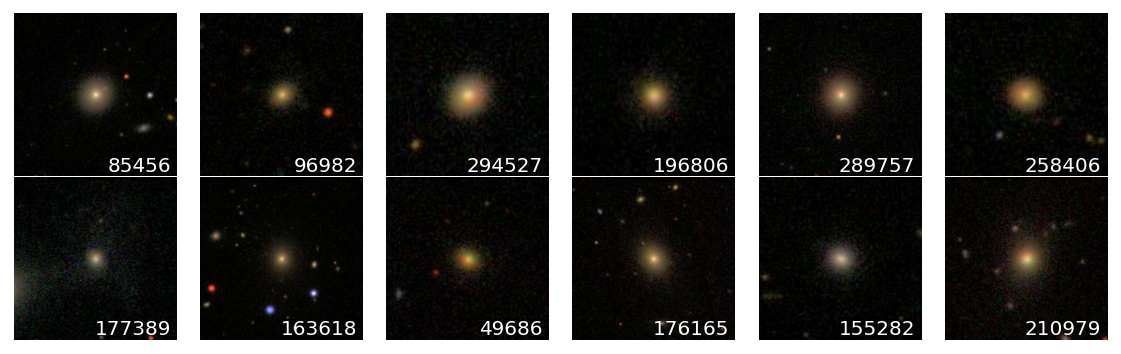

In [41]:
plot_samples(df_class0) # smooth round elliptical

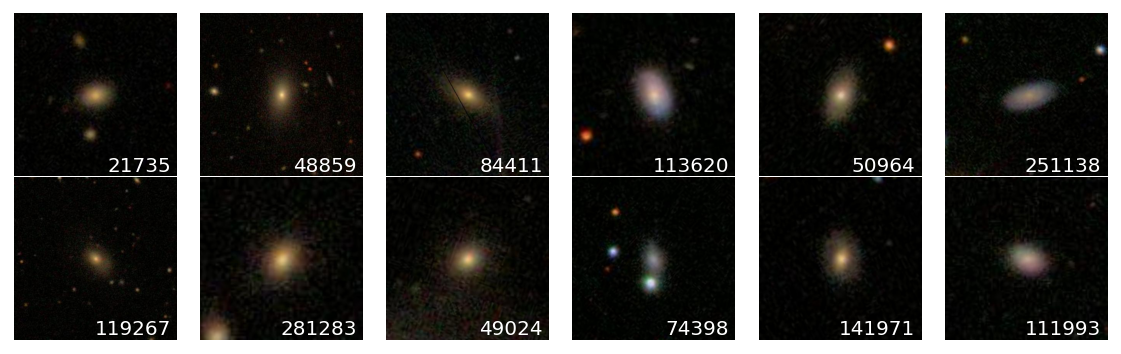

In [42]:
plot_samples(df_class1) # smooth in-between elliptical

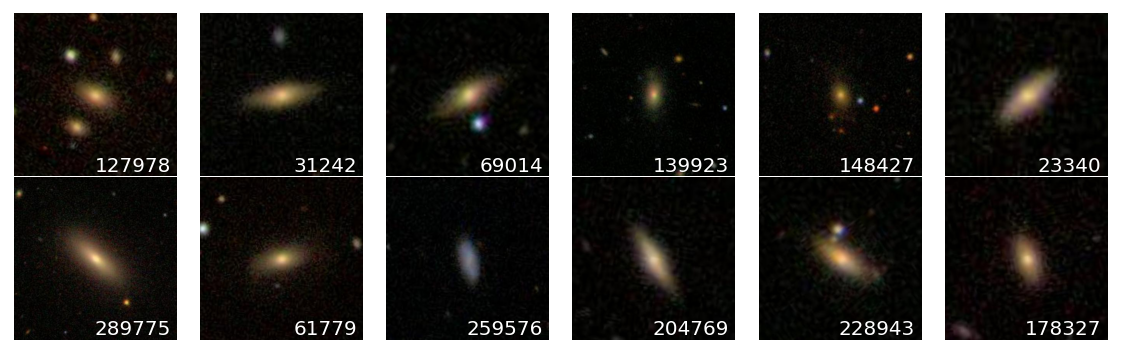

In [43]:
plot_samples(df_class2) # smooth cigar-shaped elliptical

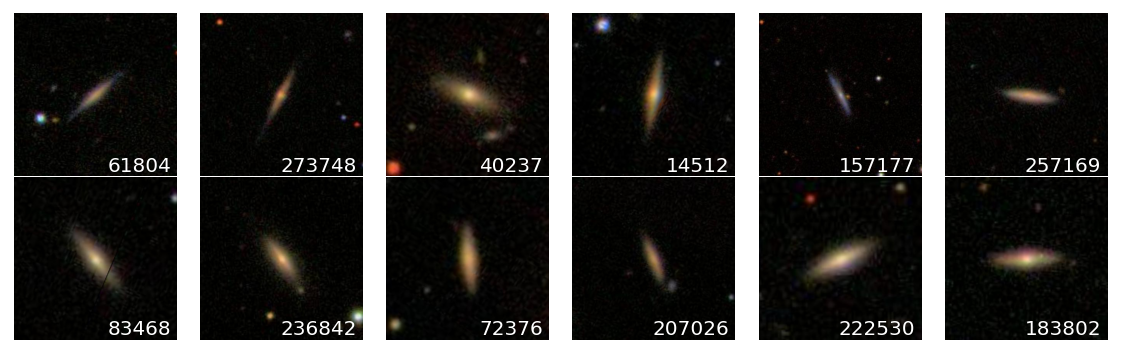

In [44]:
plot_samples(df_class3) # edge-on spiral

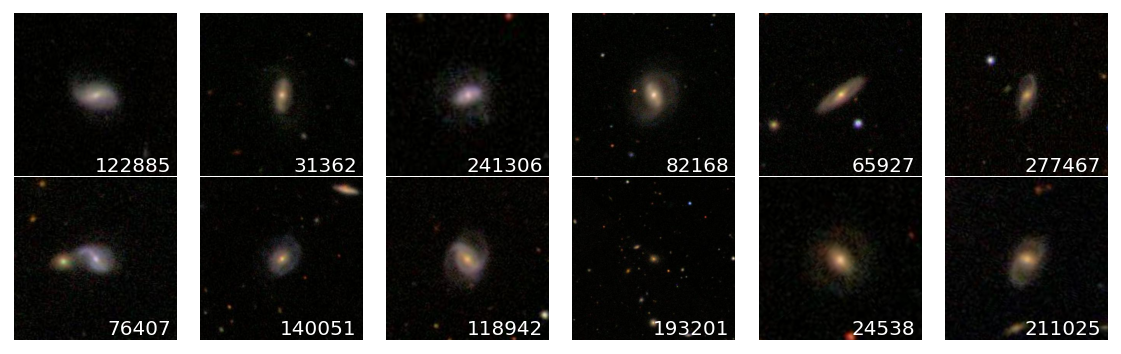

In [45]:
plot_samples(df_class4) # barred spiral

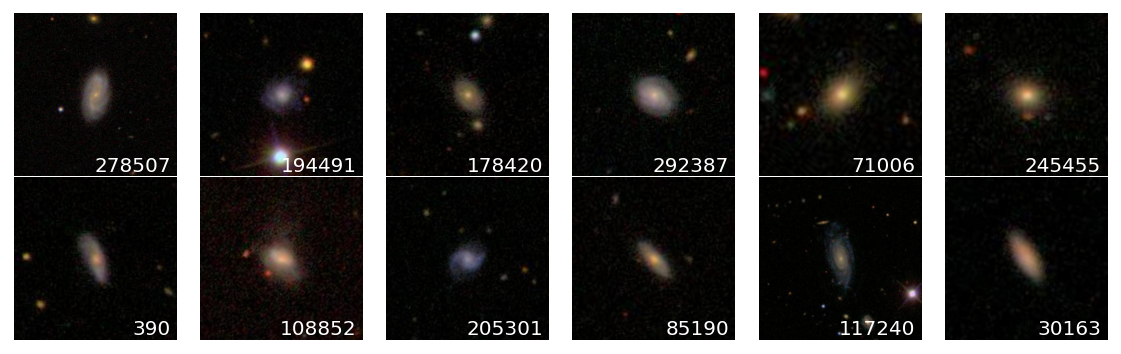

In [46]:
plot_samples(df_class5) # unbarred spiral

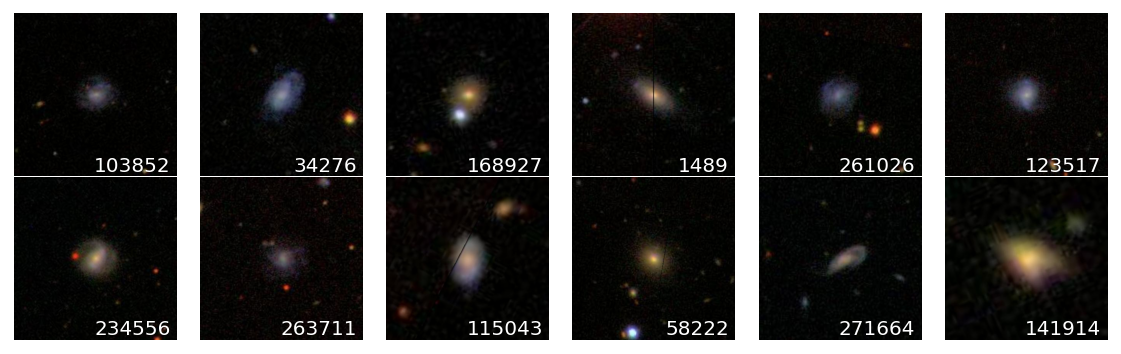

In [47]:
plot_samples(df_class6) # irregular

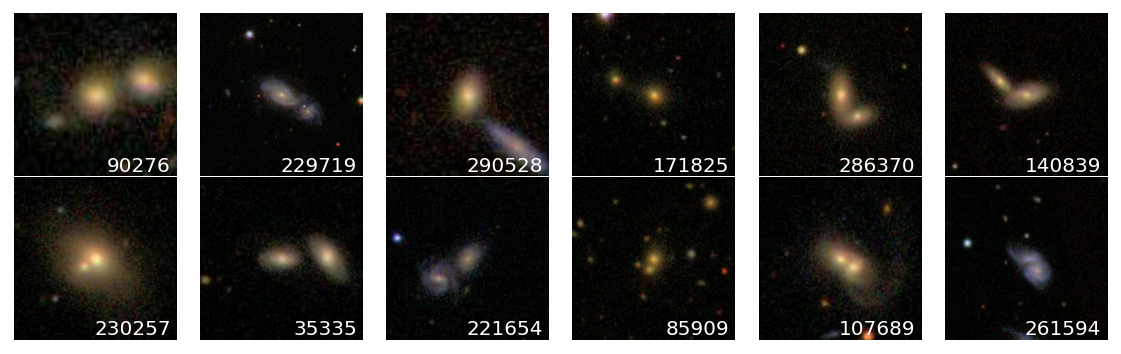

In [48]:
plot_samples(df_class7) # merger

## ------------ End ------------

(-0.5, 423.5, 423.5, -0.5)

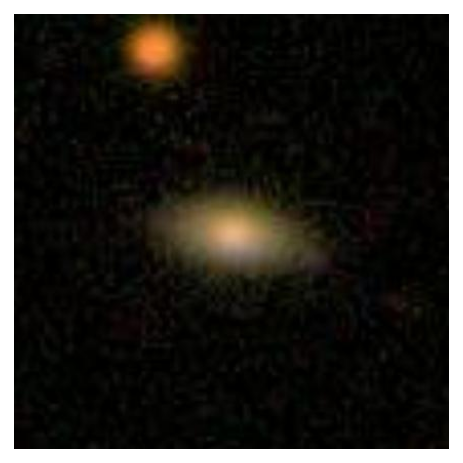

In [49]:
galaxyID = 8
current_IMG = plt.imread(dir_image+f'/{galaxyID}.jpg')
plt.imshow(current_IMG)
plt.axis('off')